In [2]:
import os
import kagglehub
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
def download_data() -> pd.DataFrame:
    """Download startup data from Kaggle and return as DataFrame"""
    
    path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")
    
    # Look for CSV files in the downloaded directory
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in {path}")
    
    if len(csv_files) > 1:
        print(f"Multiple CSV files found: {[os.path.basename(f) for f in csv_files]}")
        print(f"Using the first one: {os.path.basename(csv_files[0])}")
    
    # Load and return the DataFrame directly
    df = pd.read_csv(csv_files[0])
    print(f"Data loaded successfully: {df.shape[0]} rows, {df.shape[1]} columns")
    return df

In [9]:
df = download_data()
df

Data loaded successfully: 10000 rows, 18 columns


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [10]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
df = df[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Complain", "Exited", "Point Earned"]]
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Complain,Exited,Point Earned
0,619,42,2,0.00,1,101348.88,2,1,1,464
1,608,41,1,83807.86,1,112542.58,3,1,0,456
2,502,42,8,159660.80,3,113931.57,3,1,1,377
3,699,39,1,0.00,2,93826.63,5,0,0,350
4,850,43,2,125510.82,1,79084.10,5,0,0,425
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,0,0,300
9996,516,35,10,57369.61,1,101699.77,5,0,0,771
9997,709,36,7,0.00,1,42085.58,3,1,1,564
9998,772,42,3,75075.31,2,92888.52,2,1,1,339


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical features
numerical_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Point Earned"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

C:\Users\kutil\AppData\Local\Temp\ipykernel_15156\2505812278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Complain,Exited,Point Earned
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,-0.721130,1,1,-0.630839
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,-0.009816,1,0,-0.666251
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,-0.009816,1,1,-1.015942
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,1.412812,0,0,-1.135457
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,1.412812,0,0,-0.803472
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,-0.066419,-1.432445,0,0,-1.356781
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.027988,1.412812,0,0,0.728088
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.008643,-0.009816,1,1,-0.188192
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,-0.125231,-0.721130,1,1,-1.184148


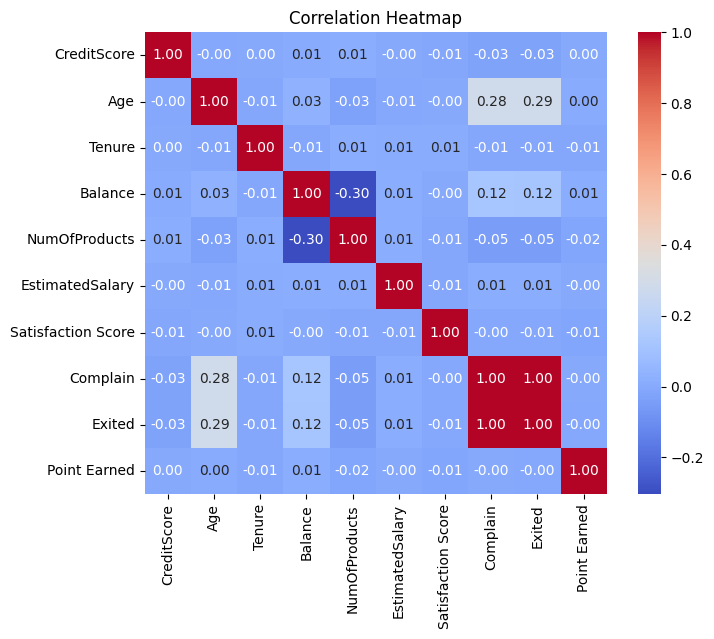

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df = df.drop("Complain", axis=1)

In [15]:
print(df["Exited"].value_counts(normalize=True))

Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


- Not great, let's improve that

In [16]:
y = df["Exited"]
X = df.drop("Exited", axis=1)

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


In [18]:
print("Original class distribution:")
print(y.value_counts(normalize=True))
print("\nResampled class distribution:")
print(y_resampled.value_counts(normalize=True))

Original class distribution:
Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64

Resampled class distribution:
Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,          # number of trees
    max_depth=None,            # allow trees to expand fully
    random_state=42,
    class_weight=None          # already balanced via SMOTE
)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

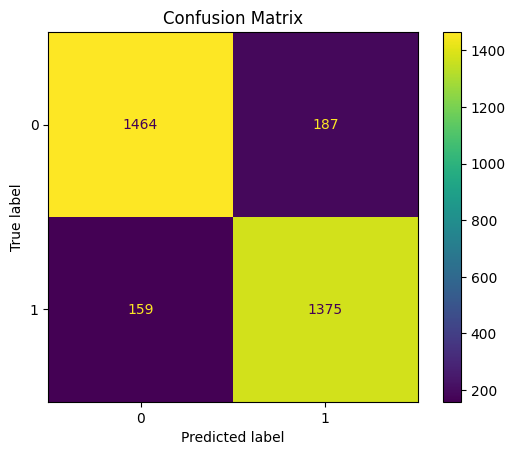

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_proba = rf.predict_proba(x_test)[:, 1]

# Class predictions (default threshold = 0.5)
y_pred_class = (y_pred_proba > 0.5).astype(int)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_class)
plt.title("Confusion Matrix")
plt.show()


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("Precision:", precision_score(y_test, y_pred_class))
print("Recall:   ", recall_score(y_test, y_pred_class))
print("F1 Score: ", f1_score(y_test, y_pred_class))
print("ROC AUC:  ", roc_auc_score(y_test, y_pred_proba))

Accuracy:  0.8913657770800628
Precision: 0.8802816901408451
Recall:    0.8963494132985659
F1 Score:  0.8882428940568475
ROC AUC:   0.9572451052935402


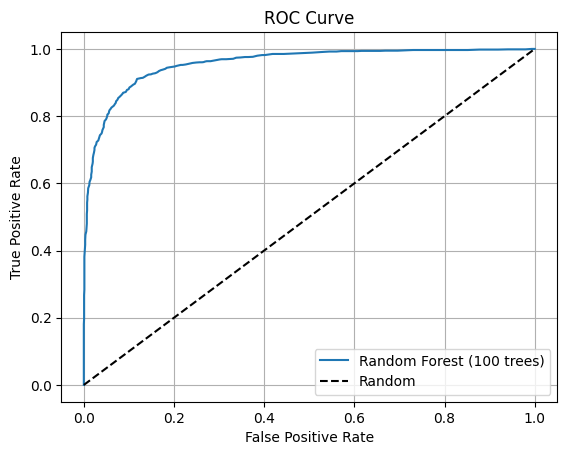

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="Random Forest (100 trees)")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

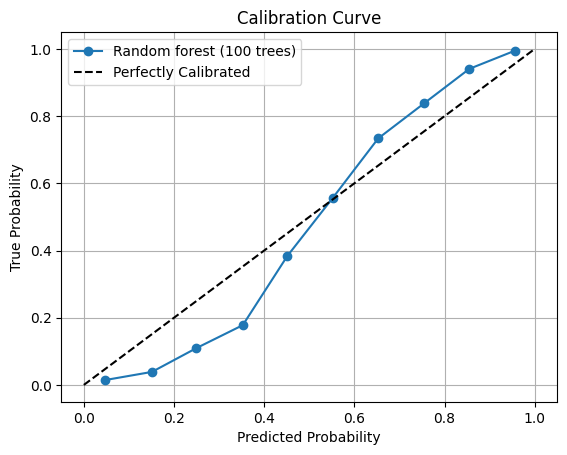

In [35]:
# calibration curve
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Random forest (100 trees)')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.legend()
plt.grid(True)
plt.show()